# data download

In [1]:
import gdown
url = 'https://drive.google.com/drive/folders/1m6r0mK_c_zrovbPOcz1EWC8PFEVLM5xY?usp=sharing'
gdown.download_folder(url=url, quiet=False)

Retrieving folder list


Processing file 1Uklc6ghaXBd17Er__M_ihLJIRhQoMBYX 2017.nc
Processing file 1UmeOYutSSSVVmeaXC3AG9vzQNYFS3O1Y 2018.nc
Processing file 1URZVMtkhwNFOB-8pQRXXYV22N5JydUuA 2019.nc
Processing file 1UE4GFXprV3sW-0xT9yIlQ9tLKxnosATT 2020.nc
Processing file 1UQhmDt21krY_AxxkViWX-UeJiiQAs3rK 2021.nc
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Uklc6ghaXBd17Er__M_ihLJIRhQoMBYX
To: /content/bur/2017.nc
100%|██████████| 39.5M/39.5M [00:00<00:00, 161MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UmeOYutSSSVVmeaXC3AG9vzQNYFS3O1Y
To: /content/bur/2018.nc
100%|██████████| 39.5M/39.5M [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1URZVMtkhwNFOB-8pQRXXYV22N5JydUuA
To: /content/bur/2019.nc
100%|██████████| 39.5M/39.5M [00:00<00:00, 89.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UE4GFXprV3sW-0xT9yIlQ9tLKxnosATT
To: /content/bur/2020.nc
100%|██████████| 39.5M/39.5M [00:01<00:00, 36.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UQhmDt21krY_AxxkViWX-UeJiiQAs3rK
To: /content/bur/2021.nc
100%|██████████| 39.5M/39.5M [00:00<00:00, 133MB/s]
Download completed


['/content/bur/2017.nc',
 '/content/bur/2018.nc',
 '/content/bur/2019.nc',
 '/content/bur/2020.nc',
 '/content/bur/2021.nc']

In [2]:
url = 'https://drive.google.com/drive/folders/1Una8W3UjxkZkNY_zYgiQEl9eieA3fL_m?usp=sharing'
gdown.download_folder(url=url, quiet=False)

Retrieving folder list


Retrieving folder 1UqFFBN0jipiOnv3BMsR_b2x87kzgXHl4 .ipynb_checkpoints
Processing file 1UrJA8-pAqVUAg2SGUCMvqY7590ddHtIq 2017.nc
Processing file 1UtNsxGE5SG4mRBL0_oe0MA2CQRrX-pxk 2018.nc
Processing file 1Uu6yWje7XzgWotOuzOjAnDt-9YabhezQ 2019.nc
Processing file 1UuHXe_iHtgzwZRbmIMash0yA1L4WEhp5 2020.nc
Processing file 1Uun1A0H_XFv5Y0x_6CdNtLHkQgL8yaay 2021.nc
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1UrJA8-pAqVUAg2SGUCMvqY7590ddHtIq
To: /content/crop/2017.nc
100%|██████████| 29.5M/29.5M [00:00<00:00, 160MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1UtNsxGE5SG4mRBL0_oe0MA2CQRrX-pxk
To: /content/crop/2018.nc
100%|██████████| 29.5M/29.5M [00:00<00:00, 105MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Uu6yWje7XzgWotOuzOjAnDt-9YabhezQ
To: /content/crop/2019.nc
100%|██████████| 29.5M/29.5M [00:00<00:00, 56.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UuHXe_iHtgzwZRbmIMash0yA1L4WEhp5
To: /content/crop/2020.nc
100%|██████████| 29.5M/29.5M [00:00<00:00, 67.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Uun1A0H_XFv5Y0x_6CdNtLHkQgL8yaay
To: /content/crop/2021.nc
100%|██████████| 29.5M/29.5M [00:00<00:00, 139MB/s] 
Download completed


['/content/crop/2017.nc',
 '/content/crop/2018.nc',
 '/content/crop/2019.nc',
 '/content/crop/2020.nc',
 '/content/crop/2021.nc']

# imports

In [3]:
import os
from collections import OrderedDict

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm, tqdm_notebook

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# dataset

In [6]:
class GeoDataset(Dataset):
    def __init__(self, region='bur', years=range(2017, 2021)):
        self.data, self.mask = self.get_dataset(years, region=region)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
          return self.data[idx], self.mask[idx]

    @staticmethod
    def get_tensor(year, region='bur'):
        array = np.moveaxis(
            xr.open_dataset(f'{region}/{year}.nc').to_array().to_numpy(), 
            0, 1)

        return torch.from_numpy(array)


    def get_dataset(self, timerange, region='bur'):
        tensors = []

        for year in timerange:
            tensors.append(
                self.get_tensor(year, region))
            
        tensor = torch.cat(tensors, dim=0)

        if region=='bur':
            data_tensor = torch.cat(
                [tensor, 
                torch.from_numpy(
                    np.full((tensor.shape[0], 3, 73, 1), np.nan))],
                dim=3)[:, :2, :72, :]

            mask_tensor = torch.cat(
                [tensor, 
                torch.from_numpy(
                    np.full((tensor.shape[0], 3, 73, 1), np.nan))],
                dim=3)[:, 2:, :72, :]

        if region=='crop':
            data_tensor = tensor[:, :2, 2:-2, 2:-2]
            mask_tensor = tensor[:, 2:, 2:-2, 2:-2]

        data_tensor = torch.nan_to_num(data_tensor)
        data_tensor = data_tensor.to(torch.double)
        data_tensor[:, 0] = torch.log(data_tensor[:, 0])

        mask_tensor = torch.where(mask_tensor>0, 1, 0)
        mask_tensor = torch.nan_to_num(mask_tensor)
        mask_tensor = mask_tensor.to(torch.double)

        return data_tensor, mask_tensor

# dataloader

In [7]:
batch_size = 16

train_dataset = GeoDataset(region='crop', years=range(2017, 2020))
val_dataset = GeoDataset(region='crop', years=range(2020, 2021))
test_dataset = GeoDataset(region='crop', years=range(2021, 2022))

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle = True, drop_last=True)

# model

In [14]:
class UNET(nn.Module):
    def __init__(self, in_channels=2, out_channels=1, n_features=16):
        super().__init__()
        features = n_features

        self.encoder1 = UNET.conv_block(in_channels, features, name='enc1')
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder2 = UNET.conv_block(features, features*2, name='enc2')
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder3 = UNET.conv_block(features*2, features*4, name='enc3')
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder4 = UNET.conv_block(features*4, features*8, name='enc4')
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = UNET.conv_block(features*8, features*16, 
                                          name='bottleneck')

        self.upconv4 = nn.ConvTranspose2d(features*16, features*8, 
                                          kernel_size=2, stride=2)
        self.decoder4 = UNET.conv_block(features*16, features*8, name='dec3')

        self.upconv3 = nn.ConvTranspose2d(features*8, features*4, 
                                          kernel_size=2, stride=2)
        self.decoder3 = UNET.conv_block(features*8, features*4, name='dec3')

        self.upconv2 = nn.ConvTranspose2d(features*4, features*2, 
                                          kernel_size=2, stride=2)
        self.decoder2 = UNET.conv_block(features*4, features*2, name='dec2')

        self.upconv1 = nn.ConvTranspose2d(features*2, features,
                                          kernel_size=2, stride=2)
        self.decoder1 = UNET.conv_block(features*2, features, name='dec1')

        self.conv = nn.Conv2d(in_channels=features, 
                              out_channels=out_channels, 
                              kernel_size=1)


    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))

        bottleneck = self.bottleneck(self.pool4(enc4))

        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        return torch.sigmoid(self.conv(dec1))


    def conv_block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (
                        name + "conv1",
                        nn.Conv2d(
                            in_channels=in_channels,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm1", nn.BatchNorm2d(num_features=features)),
                    (name + "relu1", nn.ReLU(inplace=True)),
                    (
                        name + "conv2",
                        nn.Conv2d(
                            in_channels=features,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm2", nn.BatchNorm2d(num_features=features)),
                    (name + "relu2", nn.ReLU(inplace=True)),
                ]
            )
        )


# training

## definitions

In [9]:
def fit_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = []
    acc = []

    for data, mask in train_loader:
        data = data.to(device, dtype=torch.double)
        mask = mask.to(device, dtype=torch.double)

        pred = model(data)
        loss = criterion(pred, mask)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss.append(loss.item())

    return np.array(running_loss).mean()

def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = []

    # for inputs, labels in val_loader:
    for data, mask in val_loader:
        data = data.to(device)
        mask = mask.to(device)
        with torch.no_grad():
            pred = model(data)
            loss = criterion(pred, mask)

            running_loss.append(loss.item())

    return np.array(running_loss).mean()

def train(model, train_loader, val_loader, epochs, criterion, optimizer, save_best=None):
    history = []
    best_val_loss = 1000
    log_template = '\nEpoch {ep:03d} train_loss: {t_loss:0.4f} val_loss {v_loss:0.4f}'

    with tqdm(desc='epoch', total=epochs) as pbar_outer:
        for epoch in range(epochs):
            train_loss = fit_epoch(model, train_loader, criterion, optimizer)
            
            val_loss = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, val_loss))

            if save_best:
              if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(model.state_dict(), save_best)
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss, v_loss=val_loss))
            print('')
            
    if save_best:
      model.load_state_dict(torch.load(save_best, map_location=device))  

    return history

## run

In [15]:
history = []

model = UNET().double()
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

history = train(model, train_loader, val_loader, epochs=10, 
                criterion=criterion, optimizer=optimizer)

epoch:  10%|█         | 1/10 [00:16<02:32, 16.95s/it]


Epoch 001 train_loss: 0.5606 val_loss 0.5311



epoch:  20%|██        | 2/10 [00:33<02:12, 16.51s/it]


Epoch 002 train_loss: 0.4299 val_loss 0.3910



epoch:  30%|███       | 3/10 [00:49<01:53, 16.24s/it]


Epoch 003 train_loss: 0.3616 val_loss 0.3401



epoch:  40%|████      | 4/10 [01:04<01:36, 16.08s/it]


Epoch 004 train_loss: 0.2922 val_loss 0.2669



epoch:  50%|█████     | 5/10 [01:20<01:20, 16.02s/it]


Epoch 005 train_loss: 0.2334 val_loss 0.2206



epoch:  60%|██████    | 6/10 [01:36<01:03, 15.98s/it]


Epoch 006 train_loss: 0.1869 val_loss 0.1740



epoch:  70%|███████   | 7/10 [01:52<00:47, 15.98s/it]


Epoch 007 train_loss: 0.1505 val_loss 0.1461



epoch:  80%|████████  | 8/10 [02:08<00:31, 15.97s/it]


Epoch 008 train_loss: 0.1222 val_loss 0.1220



epoch:  90%|█████████ | 9/10 [02:24<00:15, 15.95s/it]


Epoch 009 train_loss: 0.1012 val_loss 0.1083



epoch: 100%|██████████| 10/10 [02:40<00:00, 16.04s/it]


Epoch 010 train_loss: 0.0851 val_loss 0.0915



In [16]:
history.extend(
    train(model, train_loader, val_loader, epochs=10, 
                criterion=criterion, optimizer=optimizer))

epoch:  10%|█         | 1/10 [00:16<02:24, 16.05s/it]


Epoch 001 train_loss: 0.0722 val_loss 0.0835



epoch:  20%|██        | 2/10 [00:32<02:07, 16.00s/it]


Epoch 002 train_loss: 0.0623 val_loss 0.0761



epoch:  30%|███       | 3/10 [00:47<01:51, 15.99s/it]


Epoch 003 train_loss: 0.0542 val_loss 0.0688



epoch:  40%|████      | 4/10 [01:03<01:35, 15.95s/it]


Epoch 004 train_loss: 0.0482 val_loss 0.0641



epoch:  50%|█████     | 5/10 [01:19<01:19, 15.92s/it]


Epoch 005 train_loss: 0.0431 val_loss 0.0603



epoch:  60%|██████    | 6/10 [01:35<01:03, 15.91s/it]


Epoch 006 train_loss: 0.0390 val_loss 0.0556



epoch:  70%|███████   | 7/10 [01:51<00:47, 15.90s/it]


Epoch 007 train_loss: 0.0358 val_loss 0.0549



epoch:  80%|████████  | 8/10 [02:07<00:31, 15.90s/it]


Epoch 008 train_loss: 0.0328 val_loss 0.0538



epoch:  90%|█████████ | 9/10 [02:23<00:15, 15.91s/it]


Epoch 009 train_loss: 0.0304 val_loss 0.0511



epoch: 100%|██████████| 10/10 [02:39<00:00, 15.92s/it]


Epoch 010 train_loss: 0.0288 val_loss 0.0498



In [17]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

history.extend(
    train(model, train_loader, val_loader, epochs=5, 
                criterion=criterion, optimizer=optimizer))

epoch:  20%|██        | 1/5 [00:16<01:05, 16.45s/it]


Epoch 001 train_loss: 0.0275 val_loss 0.0492



epoch:  40%|████      | 2/5 [00:32<00:48, 16.27s/it]


Epoch 002 train_loss: 0.0267 val_loss 0.0480



epoch:  60%|██████    | 3/5 [00:48<00:32, 16.09s/it]


Epoch 003 train_loss: 0.0258 val_loss 0.0481



epoch:  80%|████████  | 4/5 [01:04<00:15, 15.99s/it]


Epoch 004 train_loss: 0.0253 val_loss 0.0464



epoch: 100%|██████████| 5/5 [01:20<00:00, 16.04s/it]


Epoch 005 train_loss: 0.0246 val_loss 0.0473



In [18]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

history.extend(
    train(model, train_loader, val_loader, epochs=5, 
                criterion=criterion, optimizer=optimizer))

epoch:  20%|██        | 1/5 [00:16<01:04, 16.09s/it]


Epoch 001 train_loss: 0.0241 val_loss 0.0465



epoch:  40%|████      | 2/5 [00:32<00:48, 16.06s/it]


Epoch 002 train_loss: 0.0239 val_loss 0.0479



epoch:  60%|██████    | 3/5 [00:48<00:32, 16.02s/it]


Epoch 003 train_loss: 0.0238 val_loss 0.0476



epoch:  80%|████████  | 4/5 [01:03<00:15, 15.96s/it]


Epoch 004 train_loss: 0.0238 val_loss 0.0473



epoch: 100%|██████████| 5/5 [01:19<00:00, 15.98s/it]


Epoch 005 train_loss: 0.0238 val_loss 0.0488



## loss

In [19]:
import arviz as az
az.style.use('arviz-darkgrid')

In [28]:
def plot_loss(history):
    train_losses, val_losses = [], []

    for train_loss, val_loss in history:
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Обучение')
    plt.plot(val_losses, label='Тестирование')
    plt.legend(loc='best')
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
    plt.savefig('training_loss.png', bbox_inches='tight')
    plt.show()

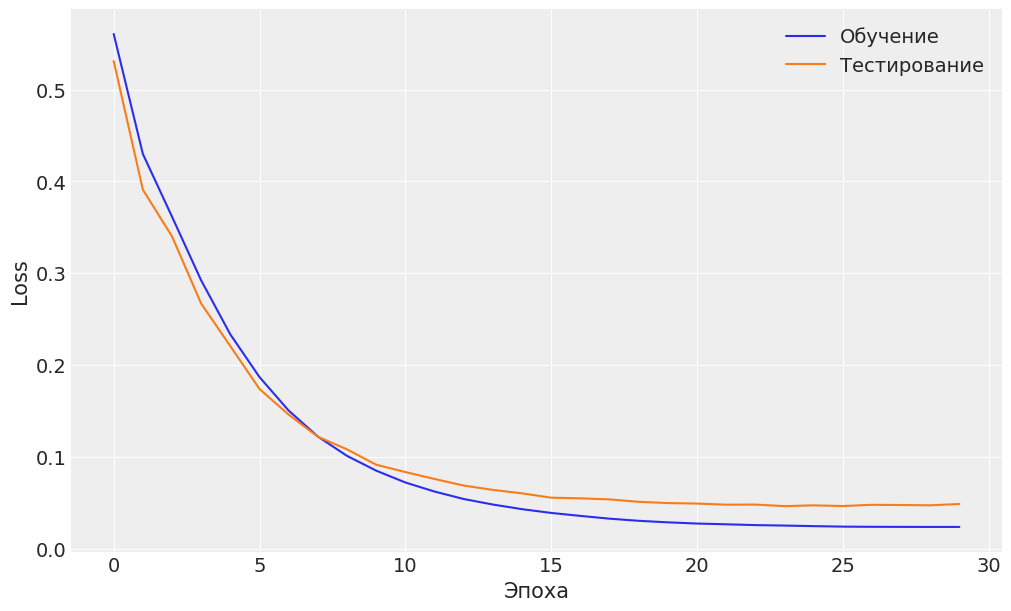

In [29]:
plot_loss(history)

In [30]:
torch.save(model, './model.pt')

In [63]:
def predict_batch(model, batch, device=device):
    with torch.no_grad():
        batch = batch.to(device, dtype=torch.double)
        model.eval()
        pred = model(batch).cpu()
        
    return pred

In [31]:
def predict_one_sample(model, inputs, device=device):
    with torch.no_grad():
        inputs = inputs.unsqueeze(0).to(device, dtype=torch.double)
        model.eval()
        pred = model(inputs).cpu()
        
    return pred[0]

In [64]:
def get_sum(threshold):
    pred_year = torch.where(predict_batch(model, test_dataset[:185][0])>threshold, 1, 0)
    pred_sum = pred_year.sum(dim=(1, 2, 3)).numpy()

    return pred_sum

In [118]:
def plot_pred(pred, save=False):
    plt.figure(figsize=(10, 6), dpi=600)

    plt.plot(pred, linewidth=1, label='Предсказание')
    plt.plot(df_sum.y, label='Наблюдения')

    plt.xticks(x_dates, labels=['1 Мая', '1 Июн', '1 Июл', '1 Авг', '1 Сен', '1 Окт', '1 Ноя'])
    plt.xlabel('Дата')
    plt.ylabel('Количество активныя ячеек')
    plt.legend(frameon=True)
    if save:
        plt.savefig(f'unet_prediction_{pred.name[5:]}.png', bbox_inches='tight')
    plt.show()

In [42]:
import pandas as pd

In [62]:
target_year = test_dataset[:185][1]
target_sum = target_year.sum(dim=(1, 2, 3)).numpy()

In [156]:
df = pd.DataFrame(data={'y': test_dataset[:185][1].flatten(),
                        'pred': torch.where(predict_batch(model, test_dataset[:185][0])>.05, 1, 0).flatten(),})
df

,y,pred
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
1695739,0.0,0
1695740,0.0,0
1695741,0.0,0
1695742,0.0,0


In [158]:
from sklearn.metrics import f1_score, roc_auc_score
print(f1_score(df.y, df.pred))

0.003795066413662239
0.5000454780634433


In [83]:
df_sum = pd.DataFrame(data={'y': target_sum,
                            'pred_0025': get_sum(.025),
                            'pred_005': get_sum(.05),
                            'pred_01': get_sum(.1),
                            'pred_02': get_sum(.2)},
                      index=xr.open_dataset('crop/2021.nc').time)

In [57]:
x_dates = list(df_sum.index[df_sum.index.day==1])
x_dates.append(pd.to_datetime('2021-11-01'))

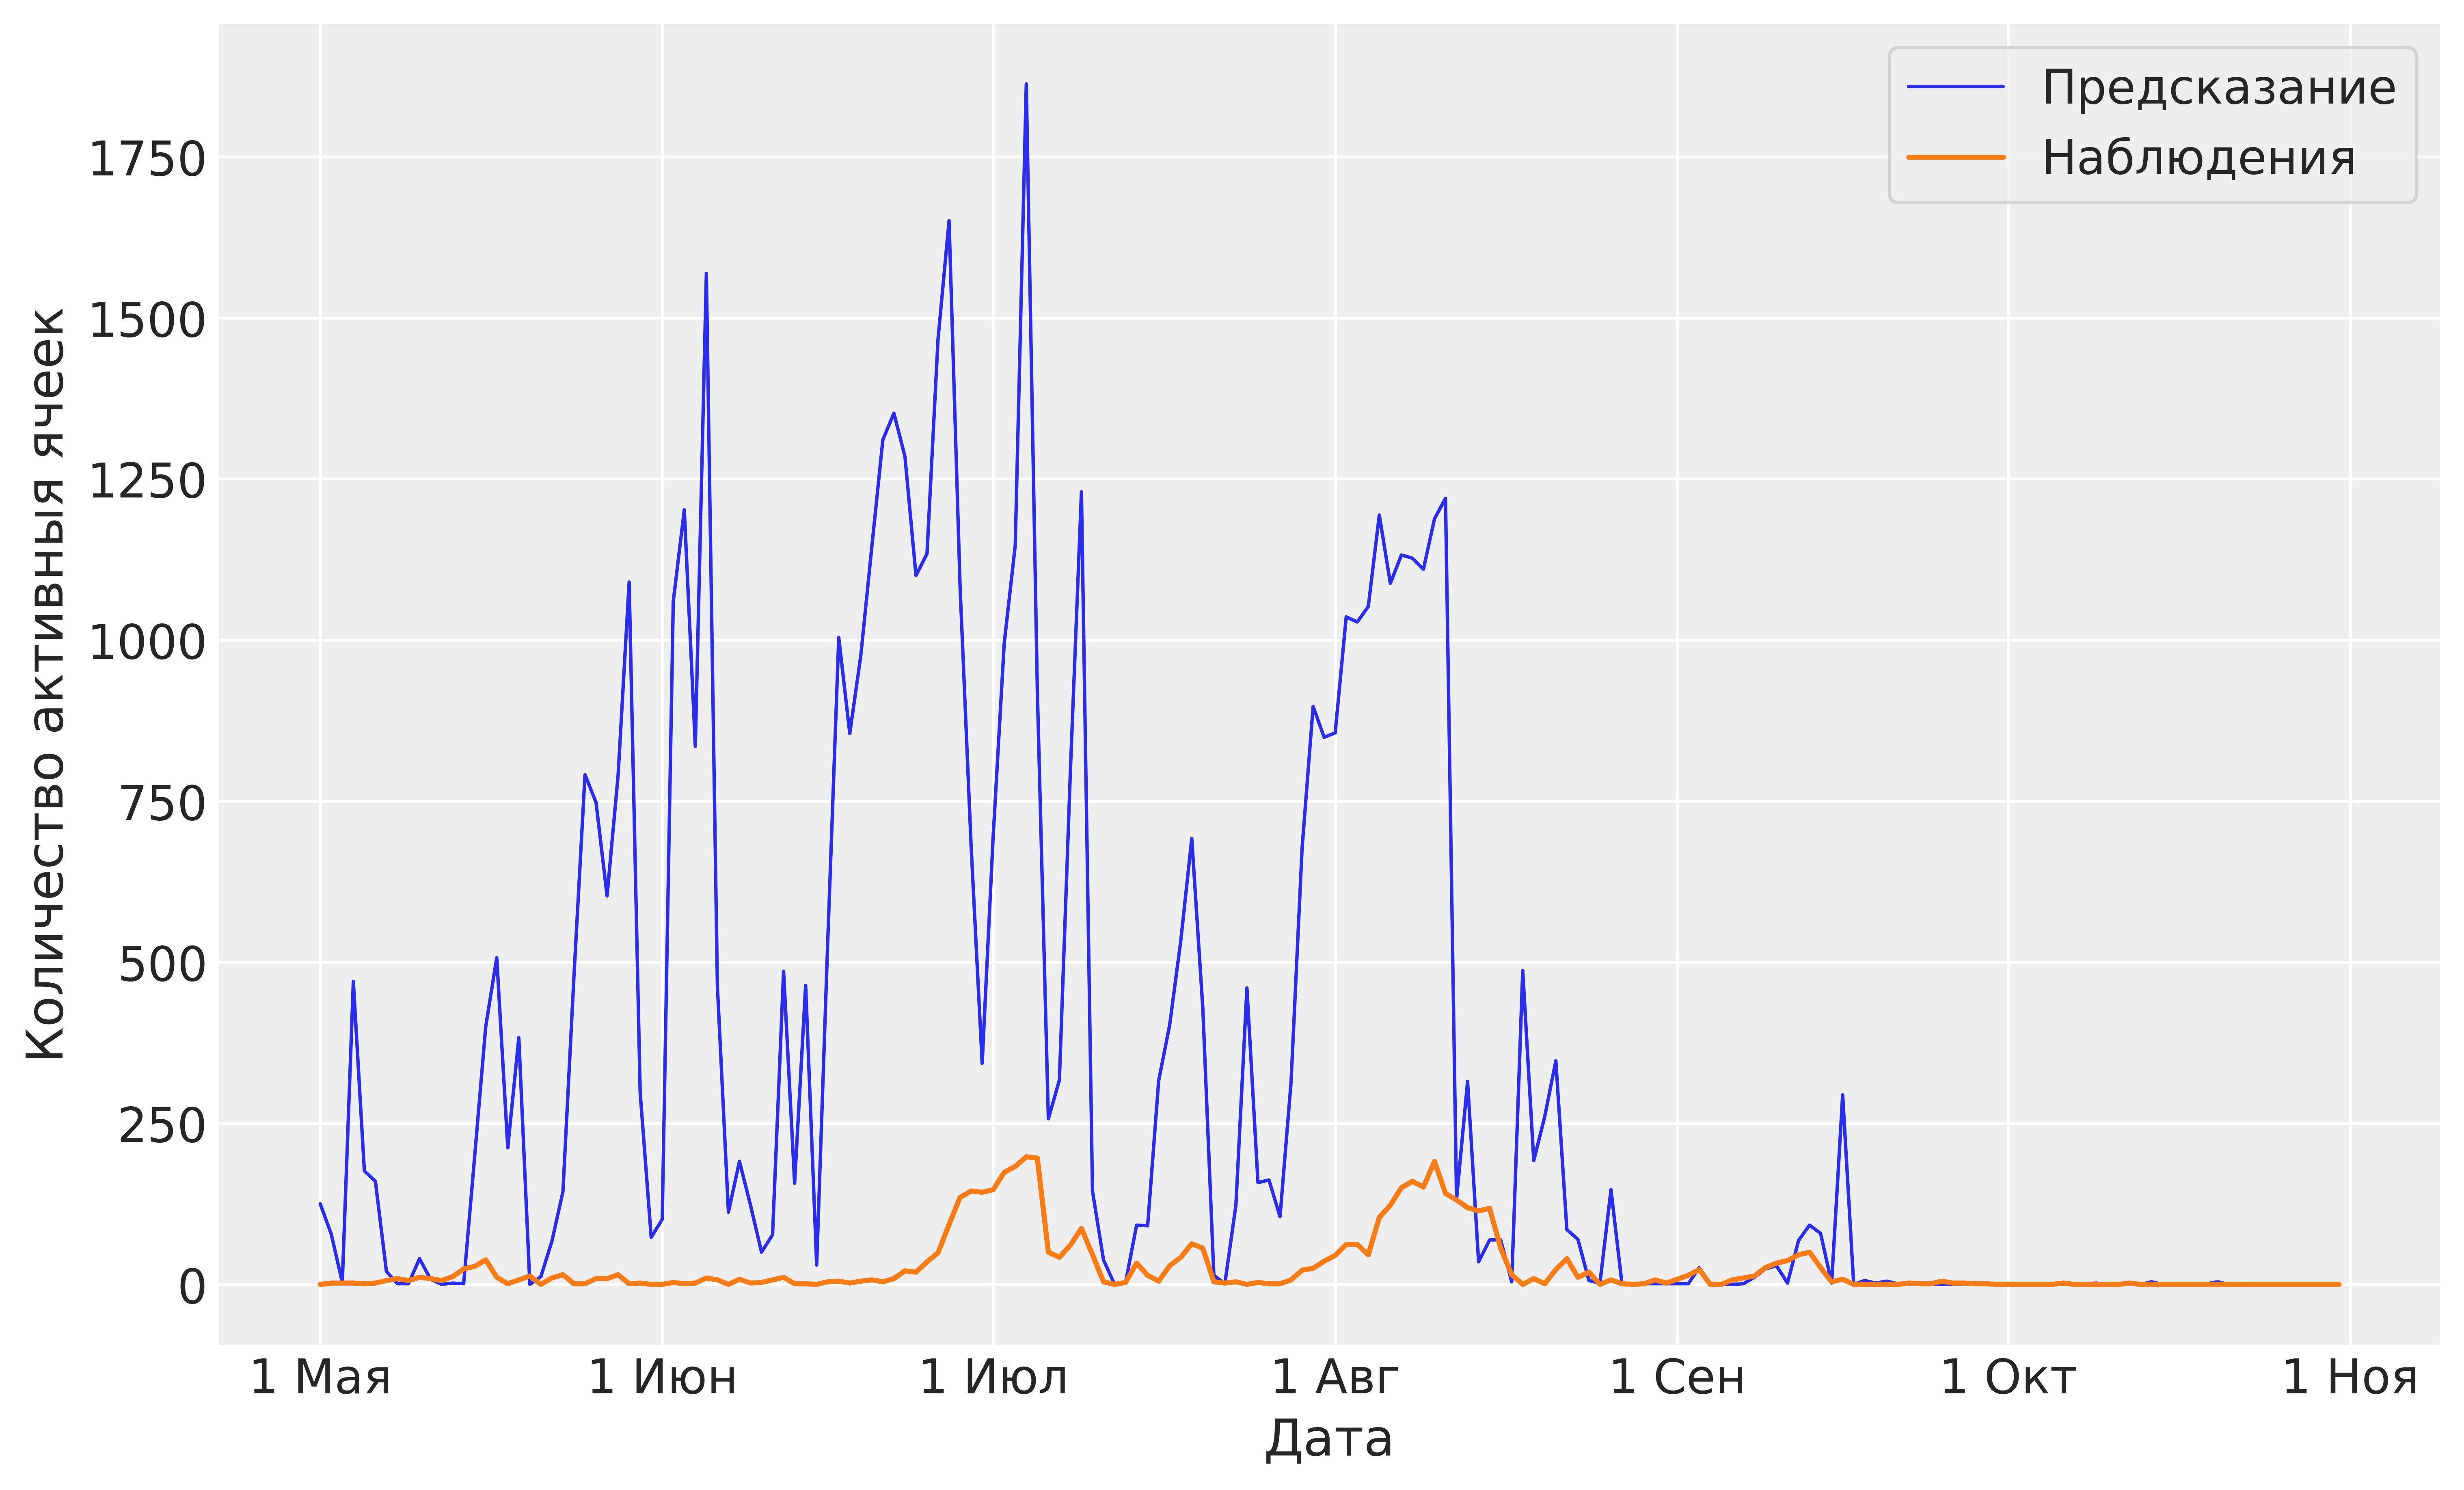

In [119]:
plot_pred(df_sum.pred_0025, save=True)

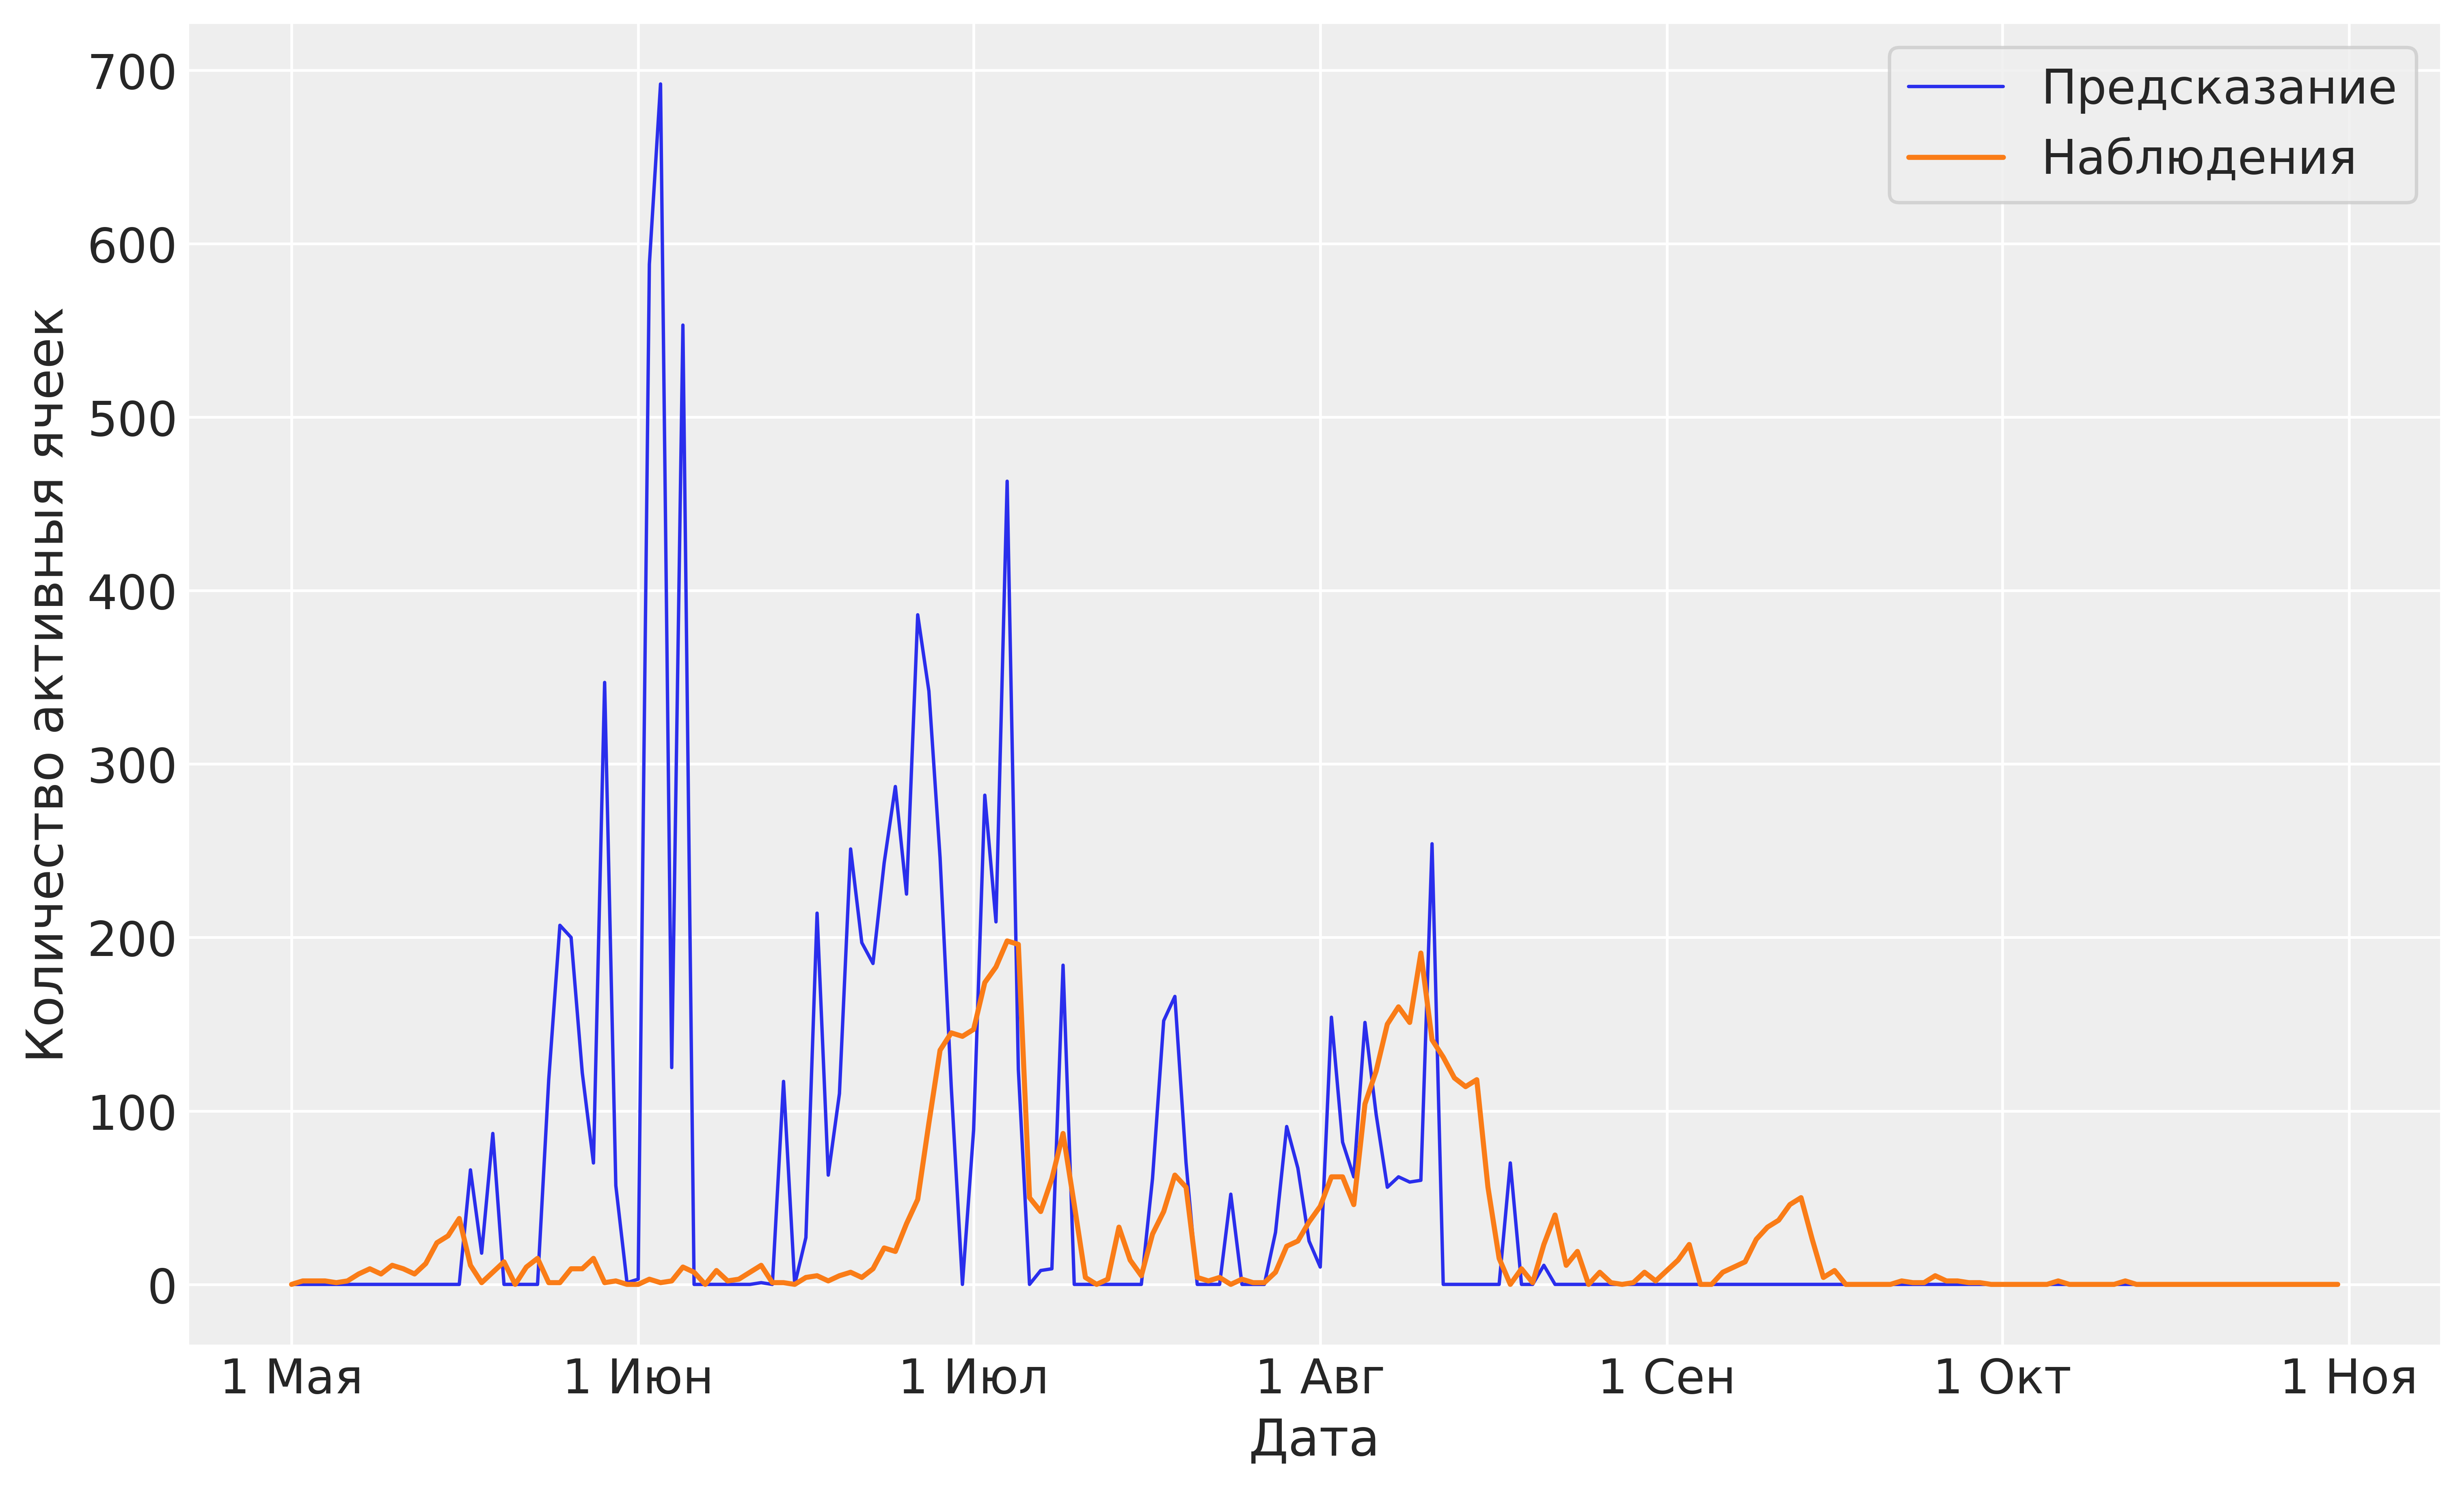

In [120]:
plot_pred(df_sum.pred_005, save=True)

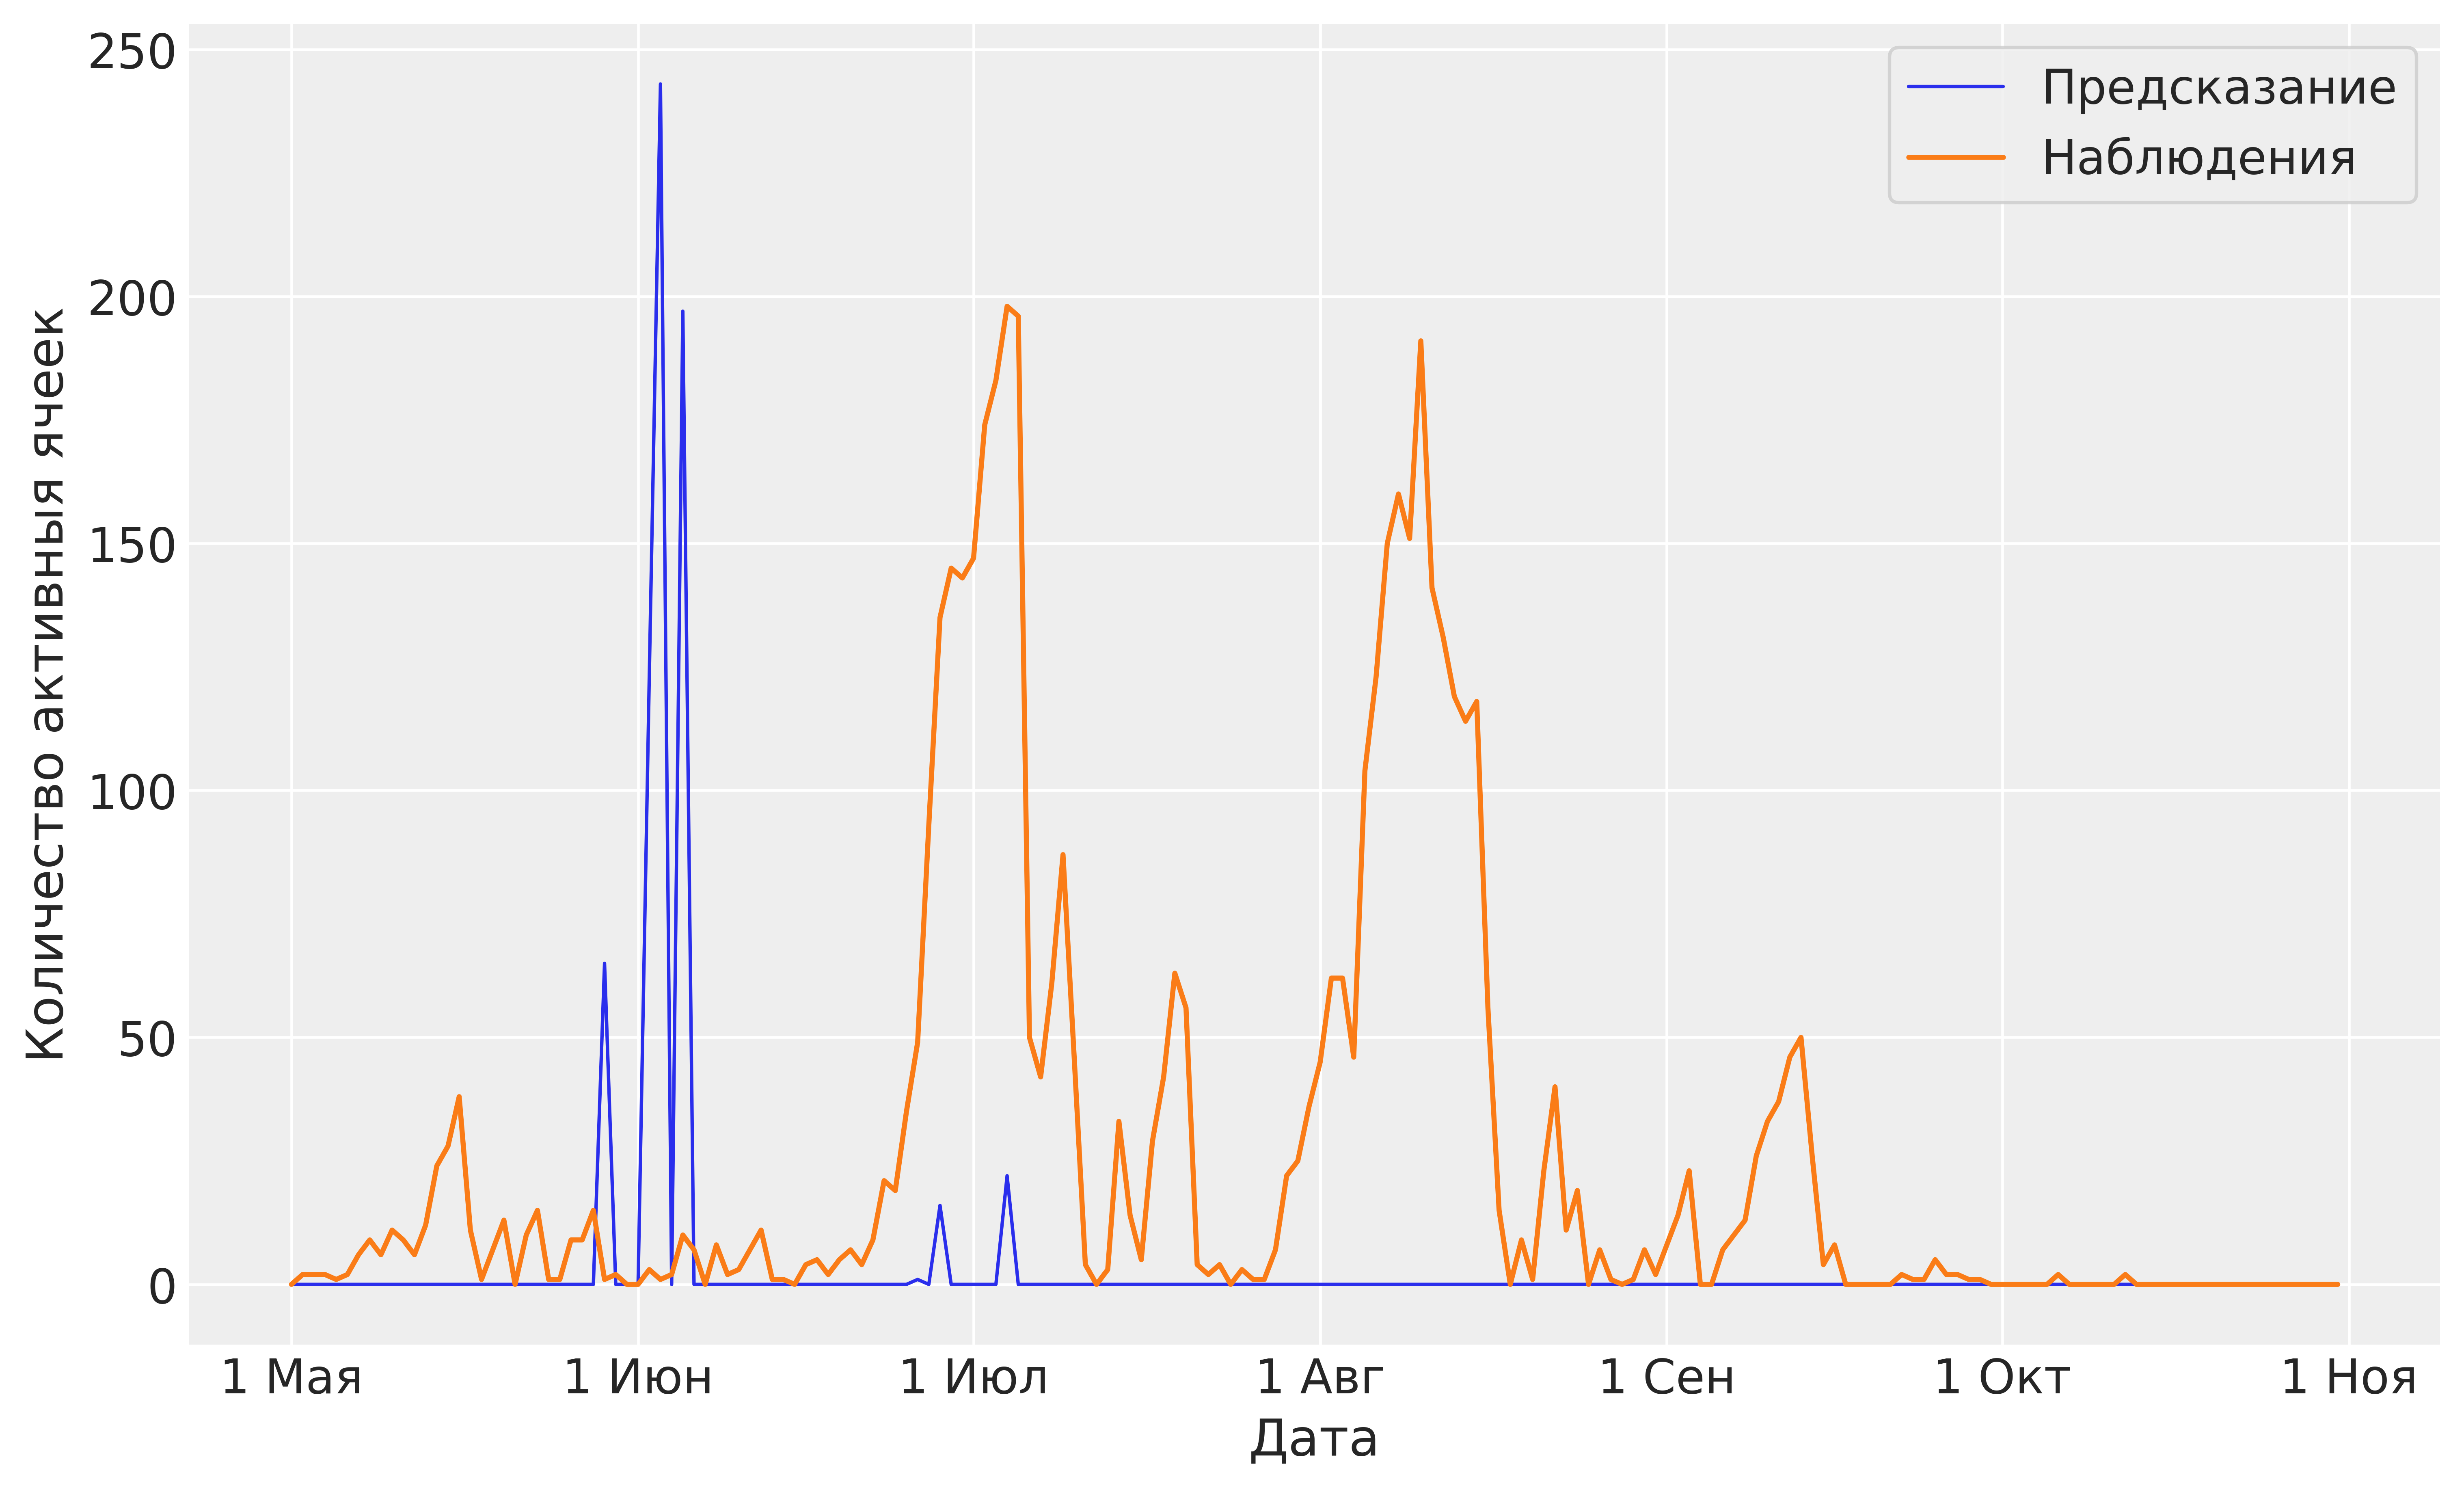

In [121]:
plot_pred(df_sum.pred_01, save=True)

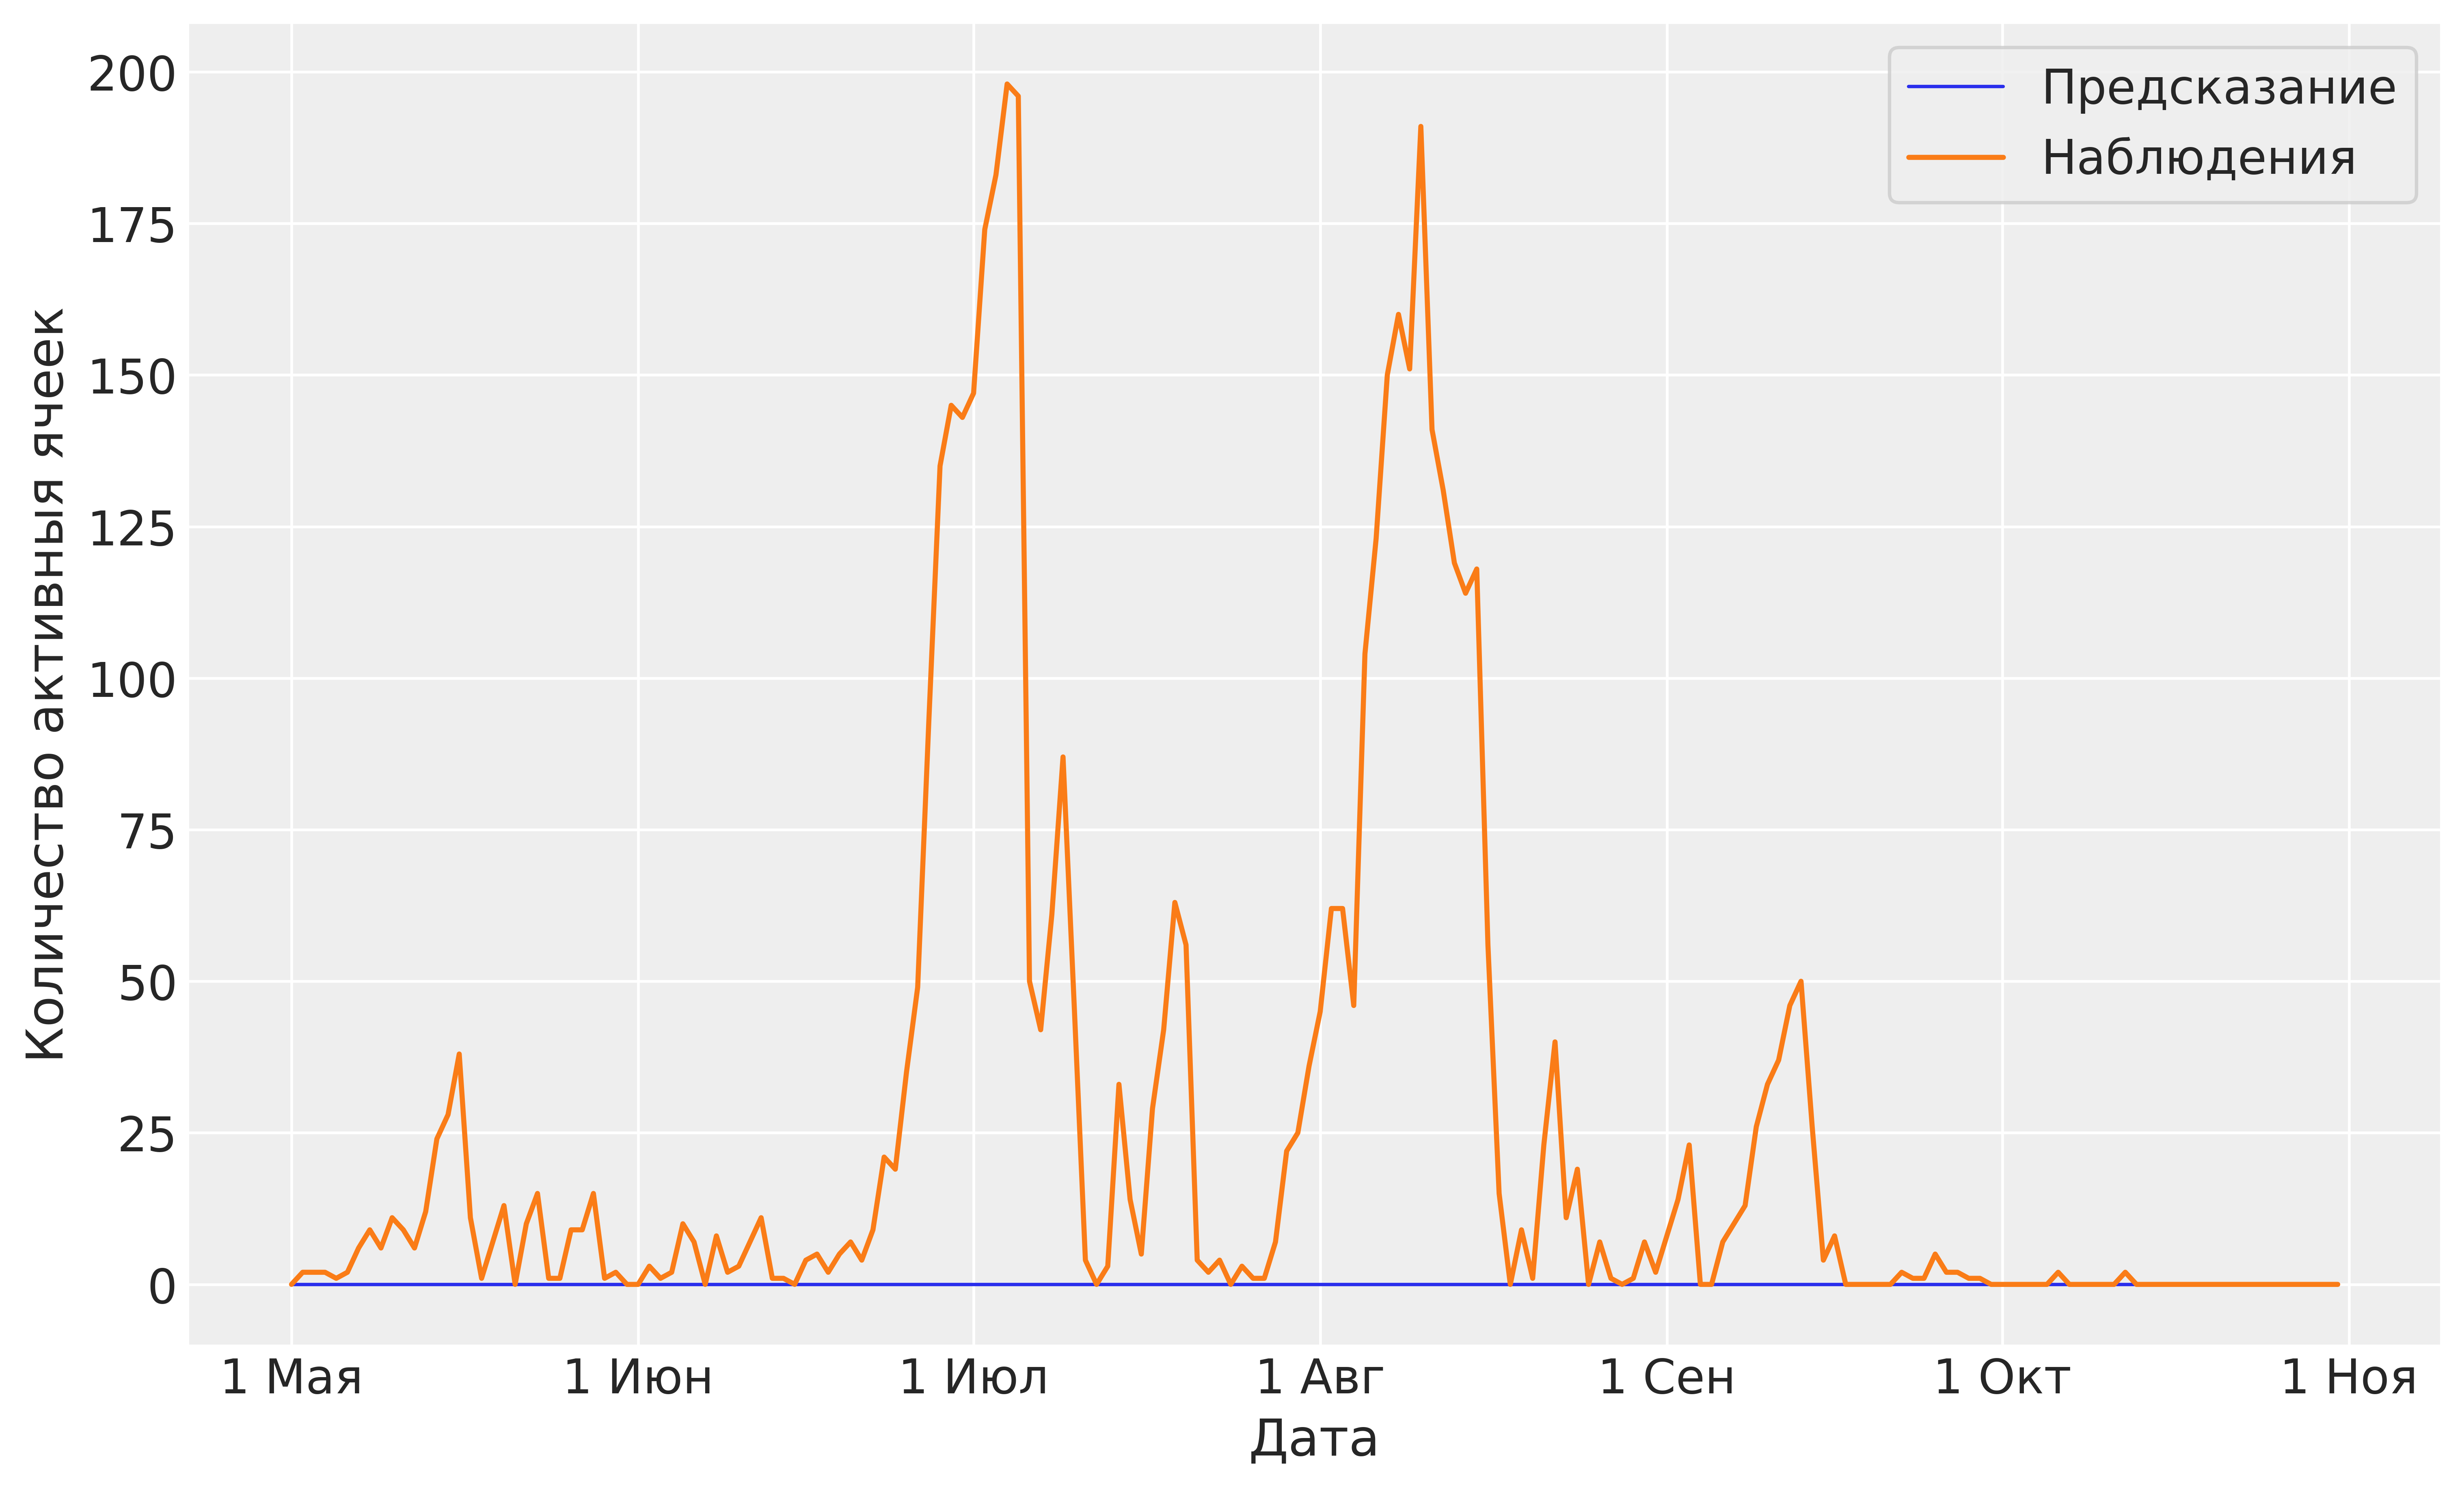

In [122]:
plot_pred(df_sum.pred_02, save=True)

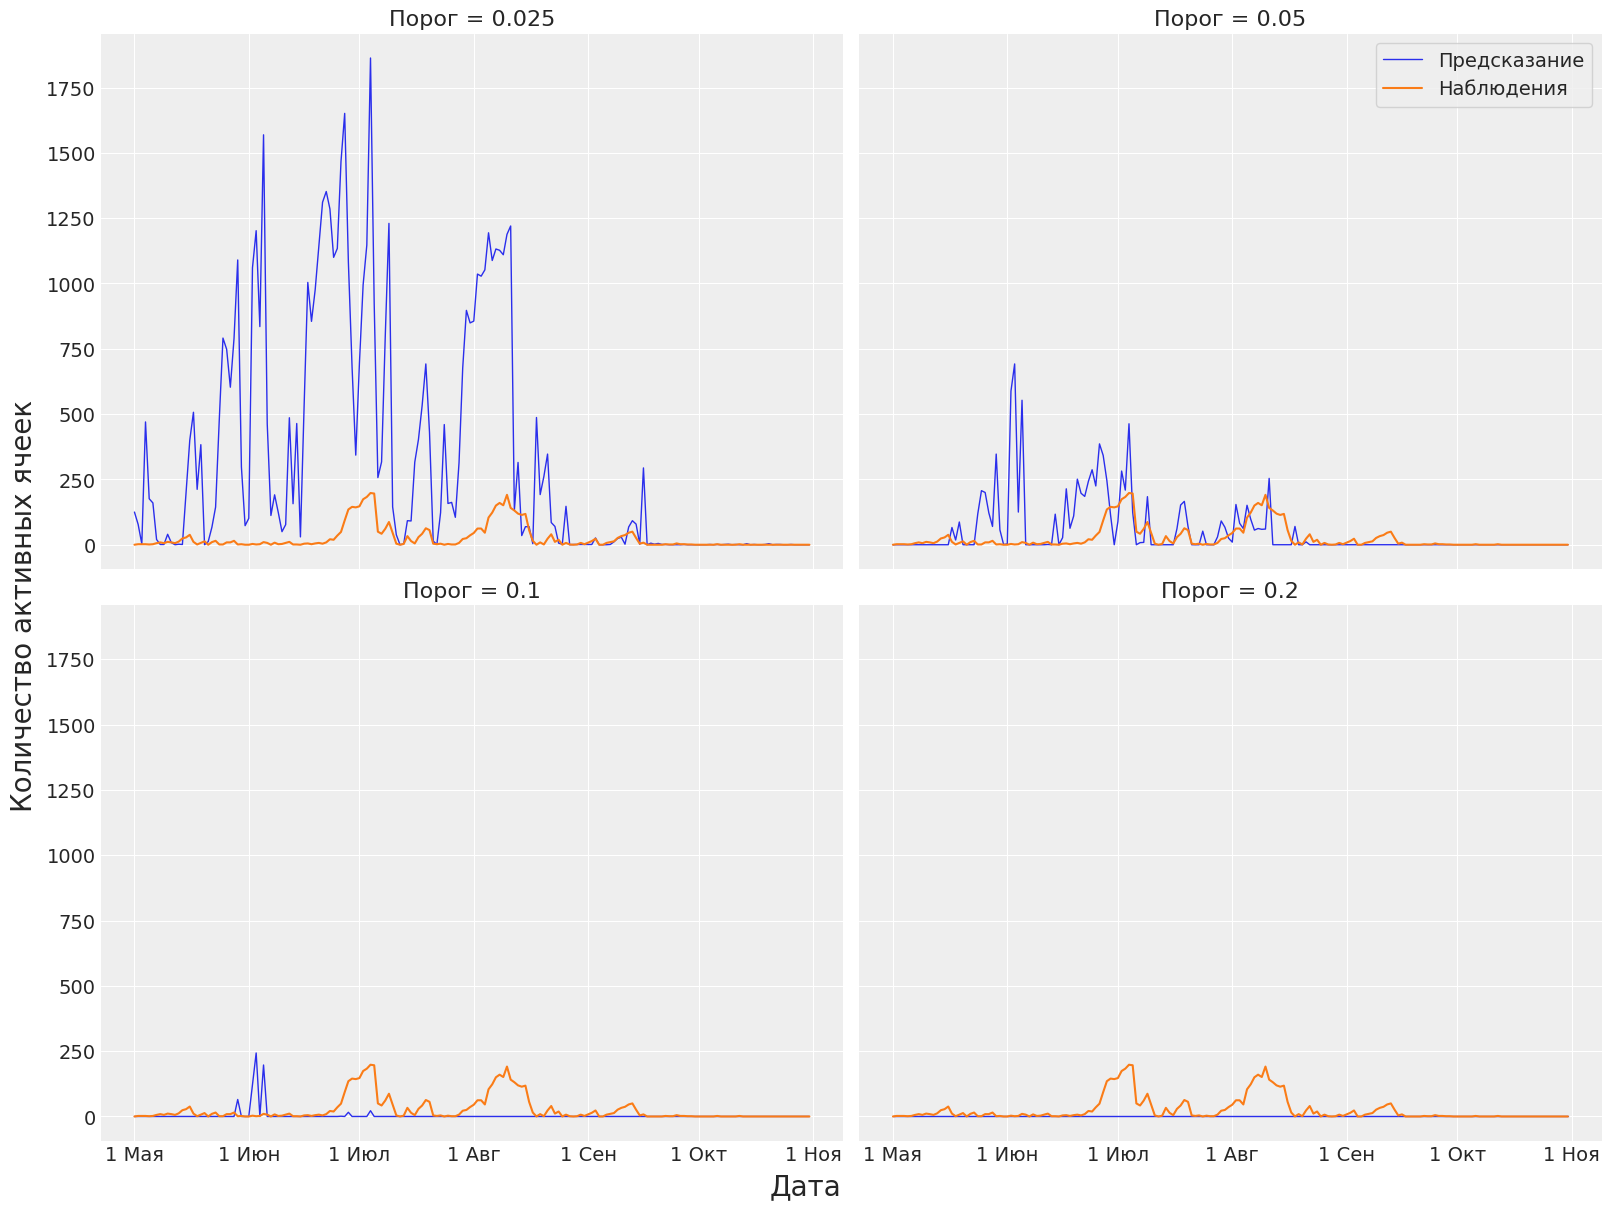

In [115]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12),
                                             sharex=True, sharey=True)
axes = zip([ax1, ax2, ax3, ax4], [df_sum.pred_0025, df_sum.pred_005, df_sum.pred_01, df_sum.pred_02])

for ax, pred in axes:
    ax.plot(pred, linewidth=1, label='Предсказание')
    ax.plot(df_sum.y, label='Наблюдения')

    ax.set_xticks(x_dates, labels=['1 Мая', '1 Июн', '1 Июл', '1 Авг', '1 Сен', '1 Окт', '1 Ноя'])
    ax.set_title(f'Порог = {pred.name[5]}.{pred.name[6:]}')
    
    if pred.name=='pred_005':
        ax.legend(frameon=True)

fig.supxlabel('Дата', fontsize=20)
fig.supylabel('Количество активных ячеек', fontsize=20)

plt.savefig(f'unet_prediction.png', bbox_inches='tight')
plt.show()

In [126]:
xr.open_dataset('crop/2021.nc').isel(x=slice(2, -2), y=slice(2, -2))

<xarray.Dataset>
Dimensions:       (time: 184, y: 96, x: 96)
Coordinates:
  * time          (time) datetime64[ns] 2021-05-01 2021-05-02 ... 2021-10-31
  * y             (y) float64 60.2 60.3 60.4 60.5 60.6 ... 69.4 69.5 69.6 69.7
  * x             (x) float64 112.3 112.4 112.5 112.6 ... 121.6 121.7 121.8
Data variables:
    FWI           (time, y, x) float64 ...
    forest_cover  (y, x) float64 ...
    counts        (time, y, x) float64 ...

In [136]:
ds.counts.sum(dim=['x', 'y']).idxmax()

<xarray.DataArray 'time' ()>
array('2021-07-04T00:00:00.000000000', dtype='datetime64[ns]')

In [129]:
ds = xr.open_dataset('crop/2021.nc').isel(x=slice(2, -2), y=slice(2, -2))
ds['counts'] = ds.counts.where(ds.counts==0, 1)
ds = ds.assign({'pred': (ds.counts.dims, 
                         torch.where(predict_batch(model, test_dataset[:185][0])>.05, 1, 0).reshape(184, 96, 96))})

In [130]:
ds

<xarray.Dataset>
Dimensions:       (time: 184, y: 96, x: 96)
Coordinates:
  * time          (time) datetime64[ns] 2021-05-01 2021-05-02 ... 2021-10-31
  * y             (y) float64 60.2 60.3 60.4 60.5 60.6 ... 69.4 69.5 69.6 69.7
  * x             (x) float64 112.3 112.4 112.5 112.6 ... 121.6 121.7 121.8
Data variables:
    FWI           (time, y, x) float64 ...
    forest_cover  (y, x) float64 ...
    counts        (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pred          (time, y, x) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

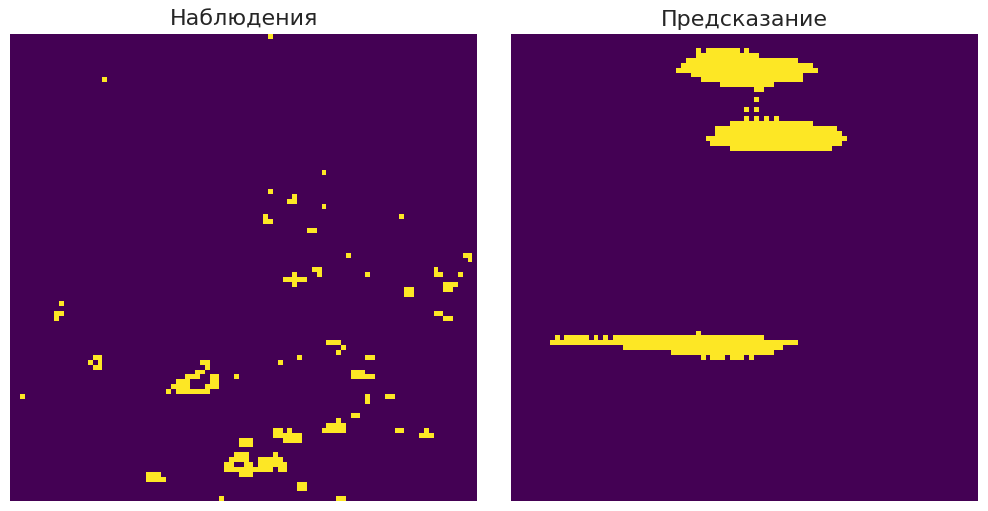

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')

ds.counts.sel(time='2021-07-04').plot(ax=ax1,
                                      add_colorbar=False, add_labels=False)
ds.pred.sel(time='2021-07-04').plot(ax=ax2,
                                    add_colorbar=False, add_labels=False)
ax1.set_title('Наблюдения')
ax2.set_title('Предсказание')

ax1.tick_params(left = False, right = False , labelleft = False,
                labelbottom = False, bottom = False)
ax2.tick_params(left = False, right = False , labelleft = False,
                labelbottom = False, bottom = False)
plt.savefig('unet_maps.png')
plt.show()

In [ ]:
target = val_dataset[0][1].clone().to(torch.int)
pred = predict_one_sample(model, val_dataset[0][0])

In [ ]:
iou = BinaryJaccardIndex()
iou(pred[0], target[0])

tensor(nan)

In [ ]:
from sklearn.metrics import jaccard_score

In [ ]:
def predict(model, loader):
    preds, probs = [], []
    for inputs in loader:
        pred, prob = predict_one_sample(model, inputs)
        preds.append(pred)
        probs.append(probs)
    return preds, probs

In [ ]:
jaccard_score(target[0].numpy(), pred[0].numpy())

In [ ]:
iou = binary_jaccard_index(torch.tensor([1, 1]), torch.tensor([1, 1]))
iou.numpy()

array(1., dtype=float32)

In [ ]:
#!pip install torchmetrics
from torchmetrics.classification import BinaryJaccardIndex
from torchmetrics.functional.classification import binary_jaccard_index

In [ ]:
imgs = [val_dataset[i][0].unsqueeze(0) for i in range(len(val_dataset))]

y_pred, _ = predict(model, imgs)

actual_labels = [val_dataset[i][1] for i in range(len(val_dataset))]


from sklearn.metrics import accuracy_score
accuracy_score(actual_labels, y_pred)

0.5490196078431373

In [ ]:
def plot_training_loss(minibatch_loss_list, num_epochs,
                    averaging_iterations=50):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)),
             (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([
            0, np.max(minibatch_loss_list[1000:])*1.5
            ])
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list,
                         np.ones(averaging_iterations,)/averaging_iterations,
                         mode='valid'),
def compute_confusion_matrix(model, data_loader, device):
    from itertools import product

    
    all_targets, all_predictions = [], []
    with torch.no_grad():

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets
            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)
            all_targets.extend(targets.to('cpu'))
            all_predictions.extend(predicted_labels.to('cpu'))

    all_predictions = all_predictions
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
        
    class_labels = np.unique(np.concatenate((all_targets, all_predictions)))
    if class_labels.shape[0] == 1:
        if class_labels[0] != 0:
            class_labels = np.array([0, class_labels[0]])
        else:
            class_labels = np.array([class_labels[0], 1])
    n_labels = class_labels.shape[0]
    lst = []
    z = list(zip(all_targets, all_predictions))
    for combi in product(class_labels, repeat=2):
        lst.append(z.count(combi))
    mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
    return mat    
    
def plot_confusion_matrix(conf_mat,
                          hide_spines=False,
                          hide_ticks=False,
                          figsize=None,
                          cmap=None,
                          colorbar=False,
                          show_absolute=True,
                          show_normed=False,
                          class_names=None):

    if not (show_absolute or show_normed):
        raise AssertionError('Both show_absolute and show_normed are False')
    if class_names is not None and len(class_names) != len(conf_mat):
        raise AssertionError('len(class_names) should be equal to number of'
                             'classes in the dataset')

    total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = conf_mat.astype('float') / total_samples

    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    if cmap is None:
        cmap = plt.cm.Blues

    if figsize is None:
        figsize = (len(conf_mat)*1.25, len(conf_mat)*1.25)

    if show_normed:
        matshow = ax.matshow(normed_conf_mat, cmap=cmap)
    else:
        matshow = ax.matshow(conf_mat, cmap=cmap)

    if colorbar:
        fig.colorbar(matshow)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if show_absolute:
                cell_text += format(conf_mat[i, j], 'd')
                if show_normed:
                    cell_text += "\n" + '('
                    cell_text += format(normed_conf_mat[i, j], '.2f') + ')'
            else:
                cell_text += format(normed_conf_mat[i, j], '.2f')
            ax.text(x=j,
                    y=i,
                    s=cell_text,
                    va='center',
                    ha='center',
                    color="white" if normed_conf_mat[i, j] > 0.5 else "black")
    
    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=90)
        plt.yticks(tick_marks, class_names)
        
    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    return fig, ax    

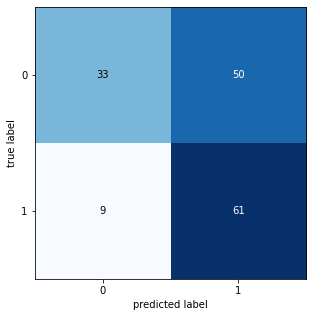

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=val_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, figsize=(5,5))